# Вывод расчета параметров цикла установки

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math

## Постоянные

In [2]:
data_root = "/home/artem/Documents/University/CoolingSystemProject/notebooks/cycle/data/"

## Функции преобразований данных

### Функции извлечения точек, соответствующих экстремальным значениям параметров установки

In [3]:
def get_max_eta_parameters(cycle_df):
    return cycle_df[cycle_df.eta == cycle_df.eta.max()]

def get_max_power_parameters(cycle_df):
    return cycle_df[cycle_df.N_e == cycle_df.N_e.max()]

### Функции извлечения характеристик трехвальных установок, соответствющих экстремальным параметрам установки

In [4]:
def get_max_eta_df(double_compressor_df):
    pi_factor = double_compressor_df[double_compressor_df.eta == double_compressor_df.eta.max()].pi_factor.values[0]
    return double_compressor_df.groupby(['pi_factor']).get_group(pi_factor)

def get_max_power_df(double_compressor_df):
    pi_factor = double_compressor_df[double_compressor_df.N_e == double_compressor_df.N_e.max()].pi_factor.values[0]
    return double_compressor_df.groupby(['pi_factor']).get_group(pi_factor)

## Функции ввода - вывода

### Функции работы с файлами

In [5]:
def read_single_compressor_data(filename):
    return pd.read_csv(data_root + filename, names=['pi', 'G', 'N_e', 'eta'])

def read_double_compressor_data(filename):
    return pd.read_csv(data_root + filename, names=['pi', 'pi_factor', 'G', 'N_e', 'eta'])

### Функции работы с текстом

In [6]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

def get_3_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    pi_factor = extremal_value_df.pi_factor.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \frac{\pi_1}{\pi_{\sum}} = %.2f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, pi_factor, eta, power, mass_rate))

### Функции работы с графиками

In [7]:
def plot_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.pi, data.G / data.G.max())
    plt.plot(data.pi, data.N_e / data.N_e.max())
    plt.plot(data.pi, data.eta / data.eta.max())
    plt.ylim([y_min, y_max])
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{N_e}$', '$\overline{\eta}$'], loc='lower right')

## Двухвальная схема без регенерации

### Приведенные характеристики установки

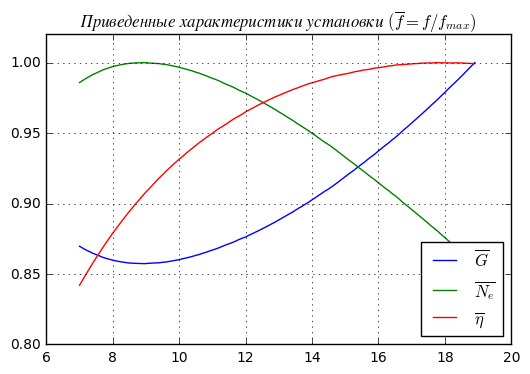

In [8]:
data_2_shafts = read_single_compressor_data('2n.csv')
plot_characteristics(data_2_shafts)
plt.show()

### Параметры установки, соответствующие ее максимальному КПД

{{get_2_shafts_parameters_note(get_max_eta_parameters(data_2_shafts))}}

### Параметры установки, соответствующие ее максимальной удельной работе

{{get_2_shafts_parameters_note(get_max_power_parameters(data_2_shafts))}}

## Двухвальная схема с регенерацией

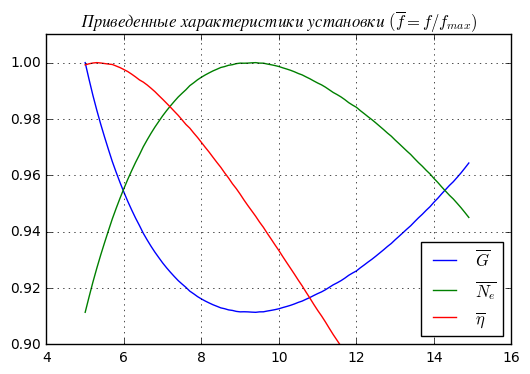

In [9]:
data_2_shafts_reg = read_single_compressor_data('2nr.csv')
plot_characteristics(data_2_shafts_reg, 0.9, 1.01)
plt.show()

### Параметры установки, соответствующие ее максимальному КПД

{{get_2_shafts_parameters_note(get_max_eta_parameters(data_2_shafts_reg))}}

### Параметры установки, соответствующие ее максимальной удельной работе

{{get_2_shafts_parameters_note(get_max_power_parameters(data_2_shafts_reg))}}

## Трехвальная схема без регенерации

In [10]:
data_3_shafts = read_double_compressor_data('3n.csv')

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальному КПД

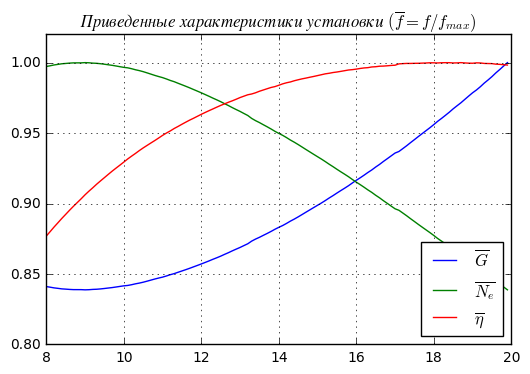

In [11]:
data_3_shafts_max_eta = get_max_eta_df(data_3_shafts)
plot_characteristics(data_3_shafts_max_eta)
plt.show()

### Параметры установки, соответствующие максимальному КПД

{{get_3_shafts_parameters_note(get_max_eta_parameters(data_3_shafts_max_eta))}}

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальной удельной работе

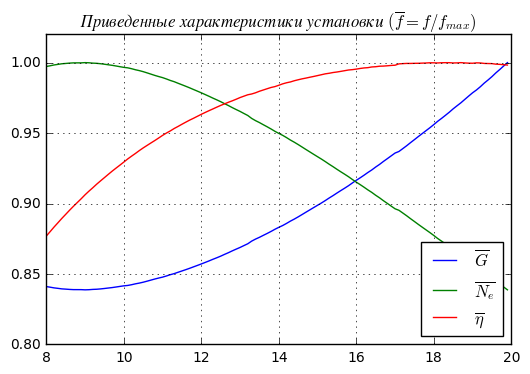

In [12]:
data_3_shafts_max_power = get_max_power_df(data_3_shafts)
plot_characteristics(data_3_shafts_max_power)
plt.show()

### Параметры установки, соответствующие максимальной удельной работе

{{get_3_shafts_parameters_note(get_max_power_parameters(data_3_shafts_max_eta))}}

## Трехвальная схема с регенератором

Схема довольно странная, так как на высоких степенях повышения давления регенератор греет выхлоп, а на низких в ней нет смысла, так как почти тех же значений КПД можно добиться на двухвальной установке с регенератором

In [13]:
data_3_shafts_reg = read_double_compressor_data('3nr.csv')

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальному КПД

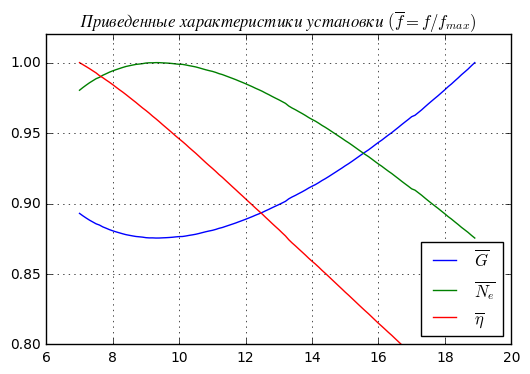

In [14]:
data_3_shafts_reg_max_eta = get_max_eta_df(data_3_shafts_reg)
plot_characteristics(data_3_shafts_reg_max_eta)
plt.show()

### Параметры установки, соответствующие максимальному КПД

{{get_3_shafts_parameters_note(get_max_eta_parameters(data_3_shafts_reg_max_eta))}}

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальной удельной работе

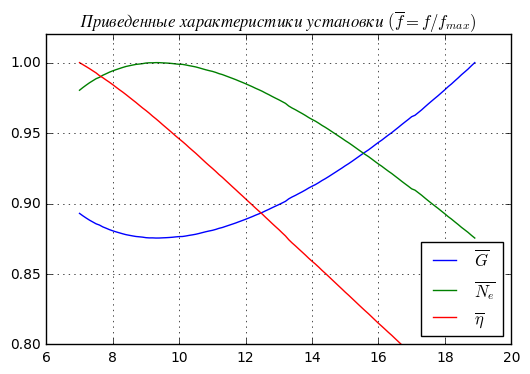

In [15]:
data_3_shafts_reg_max_power = get_max_power_df(data_3_shafts_reg)
plot_characteristics(data_3_shafts_reg_max_power)
plt.show()

### Параметры установки, соответствующие максимальной удельной работе

{{get_3_shafts_parameters_note(get_max_power_parameters(data_3_shafts_reg_max_eta))}}

## Трехвальная схема с промежуточых охлаждением

In [16]:
data_3_shafts_cool = read_double_compressor_data('3nc.csv')

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальному КПД

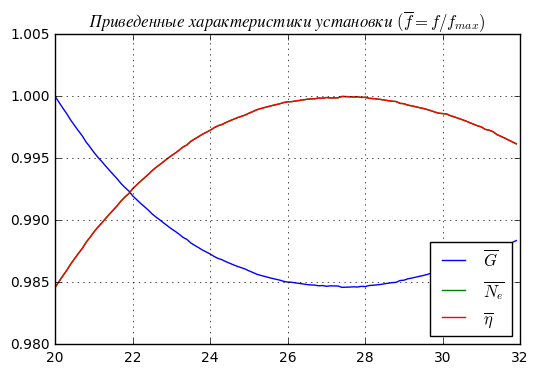

In [17]:
data_3_shafts_cool_max_eta = get_max_eta_df(data_3_shafts_cool)
plot_characteristics(data_3_shafts_cool_max_eta, 0.98, 1.005)
plt.show()

### Параметры установки, соответствующие максимальному КПД

{{get_3_shafts_parameters_note(get_max_eta_parameters(data_3_shafts_cool_max_eta))}}

## Трехвальная схема с промежуточых охлаждением и регенерацией

In [18]:
data_3_shafts_cool_reg = read_double_compressor_data('3ncr.csv')

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальному КПД

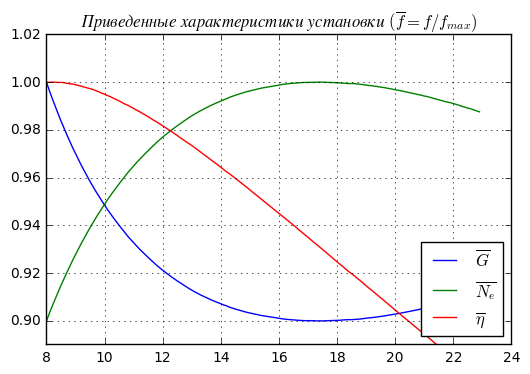

In [19]:
data_3_shafts_cool_reg_max_eta = get_max_eta_df(data_3_shafts_cool_reg)
plot_characteristics(data_3_shafts_cool_reg_max_eta, 0.89)
plt.show()

### Параметры установки, соответствующие максимальному КПД

{{get_3_shafts_parameters_note(get_max_eta_parameters(data_3_shafts_cool_reg_max_eta))}}

### Приведенные характеристики установки для распределения сжатия между компрессорами, соответствующего максимальной удельной работе

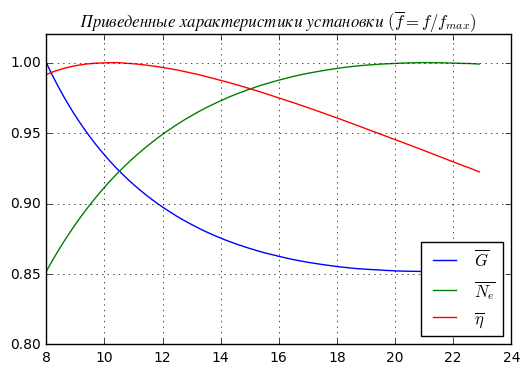

In [20]:
data_3_shafts_cool_reg_max_power = get_max_power_df(data_3_shafts_cool_reg)
plot_characteristics(data_3_shafts_cool_reg_max_power)
plt.show()

### Параметры установки, соответствующие максимальной удельной работе

{{get_3_shafts_parameters_note(get_max_power_parameters(data_3_shafts_cool_reg_max_power))}}